In [1]:
import __init__
#
from IPython.display import HTML, display
import pandas as pd
import numpy as np
#
def text_display(text, font_size):
    display(HTML('<font size=%d>' % font_size + text + '</font>'))   
#
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from community_analysis import ss_trips_dpath, ss_trips_prefix
df = pd.read_csv('%s/%s0901.csv' % (ss_trips_dpath, ss_trips_prefix))

In [3]:
df.tail()

,did,hour,zi,zj,time,day,month,start-long,start-lat,distance,duration,fare,queueingTime
399048,33871,19,54,13,1233230340,29,1,103.85323,1.29766,2.5,300,800,11
399049,17703,19,55,13,1233230340,29,1,103.85772,1.29583,5.4,660,1040,23
399050,19140,19,81,32,1233230340,29,1,103.97191,1.38266,13.9,1680,1885,207
399051,30060,19,56,18,1233230340,29,1,103.85968,1.31914,10.9,1260,1165,118
399052,20633,19,29,21,1233230340,29,1,103.74060,1.33353,5.6,780,805,1148


# Before filtering
## SpendingTime

In [7]:
cn = 'queueingTime'

th = 40 * 60
print th
print len(df), len(df[(df[cn] > th)]), len(df[(df[cn] > th)]) / float(len(df))

2400
399053 10994 0.0275502251581


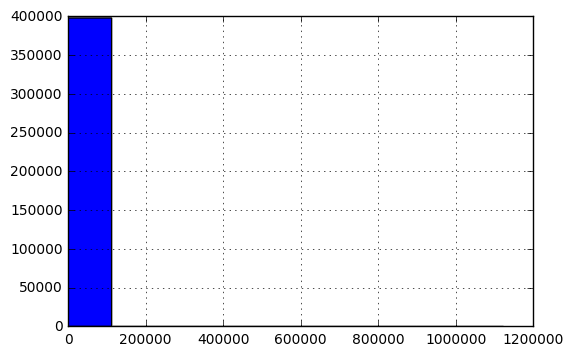

In [8]:
text = 'mean %.3f, s.d %.3f' % (df[cn].mean(), df[cn].std())
text_display(text, 5)
df[cn].hist()

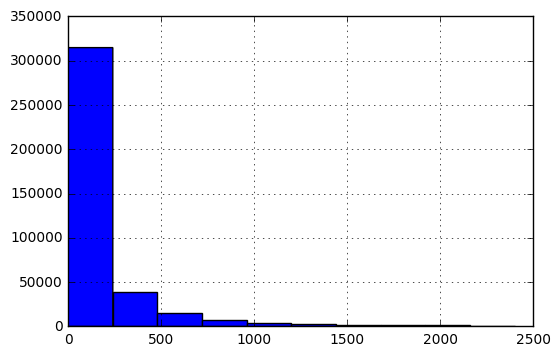

In [10]:
tdf = df[(df[cn] <= th)]
tdf[cn].hist()

## roamingTime

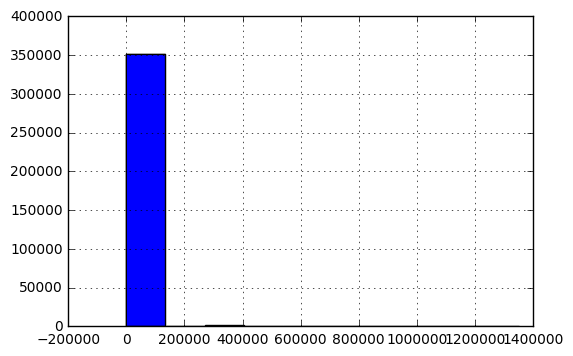

In [5]:
cn = 'roamingTime'
text = 'mean %.3f, s.d %.3f' % (df[cn].mean(), df[cn].std())
text_display(text, 5)
df[cn].hist()

# Filtering

In [6]:
outlier_set = set()
cn1, cn2 = 'spendingTime', 'roamingTime'
outlier_set = outlier_set.union(set(np.where(df[cn1] > df[cn2])[0].tolist()))
for cn in [cn1, cn2]:
    outlier_set = outlier_set.union(set(np.where(df[cn] < 0)[0].tolist()))
    outlier_set = outlier_set.union(set(np.where(df[cn] > df[cn].quantile(0.95))[0].tolist()))
df = df.drop(df.index[list(outlier_set)])

# After filtering
## SpendingTime

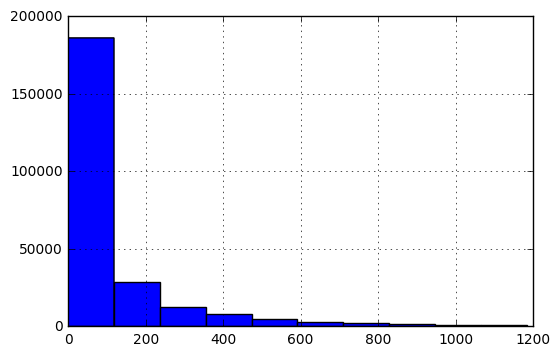

In [7]:
cn = 'spendingTime'
text = 'mean %.3f, s.d %.3f' % (df[cn].mean(), df[cn].std())
text_display(text, 5)
df[cn].hist()

## roamingTime

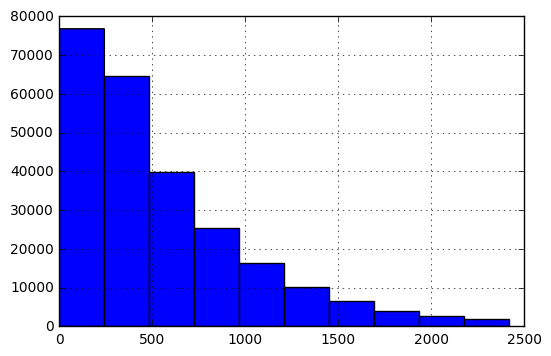

In [8]:
cn = 'roamingTime'
text = 'mean %.3f, s.d %.3f' % (df[cn].mean(), df[cn].std())
text_display(text, 5)
df[cn].hist()